## 1. Dataset
----

In [1]:
# !git clone -o StrictHostKeyChecking=no https://github.com/alexeygrigorev/clothing-dataset-small.git

## 2. Configurations
----

In [5]:
!pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

from tensorflow.keras.preprocessing.image import ImageDataGenerator


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


2025-11-23 21:45:50.379261: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-23 21:45:50.430801: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-23 21:45:52.706331: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [5]:
path = './clothing-dataset-small/train/t-shirt/'
name = '0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg'
fullname = f'{path}/{name}'

In [6]:
img = load_img(fullname, target_size=(299,299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

## 3. Pre-trained convulotional neural networks
----

In [9]:
model = Xception(
    weights='imagenet',
    input_shape=(299,299,3)
)

2025-11-23 15:05:41.796437: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
X = np.array([x])

In [11]:
X.shape

(1, 299, 299, 3)

In [12]:
X = preprocess_input(X)

In [13]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [14]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.9524979)),
  ('n04370456', 'sweatshirt', np.float32(0.009788689)),
  ('n04033995', 'quilt', np.float32(0.0031949775)),
  ('n03710637', 'maillot', np.float32(0.0012328895)),
  ('n03188531', 'diaper', np.float32(0.001185509))]]

## 4. Tranfer learning
----

In [16]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [17]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150,150), 
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [18]:
X, y = next(train_ds)

In [19]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(150,150), 
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [20]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [21]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [22]:
history = model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5


2025-11-23 13:36:30.996547: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 19625984 exceeds 10% of free system memory.
2025-11-23 13:36:31.016344: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 37158912 exceeds 10% of free system memory.
2025-11-23 13:36:31.104760: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 18579456 exceeds 10% of free system memory.
2025-11-23 13:36:31.105240: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 37158912 exceeds 10% of free system memory.
2025-11-23 13:36:31.141874: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 74317824 exceeds 10% of free system memory.


96/96 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.6587 - loss: 1.3298 - val_accuracy: 0.7595 - val_loss: 0.8776
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.8145 - loss: 0.5912 - val_accuracy: 0.7654 - val_loss: 0.9877
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.8794 - loss: 0.3414 - val_accuracy: 0.7566 - val_loss: 1.0749
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9065 - loss: 0.2695 - val_accuracy: 0.8270 - val_loss: 0.7392
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.9511 - loss: 0.1332 - val_accuracy: 0.7947 - val_loss: 0.8237


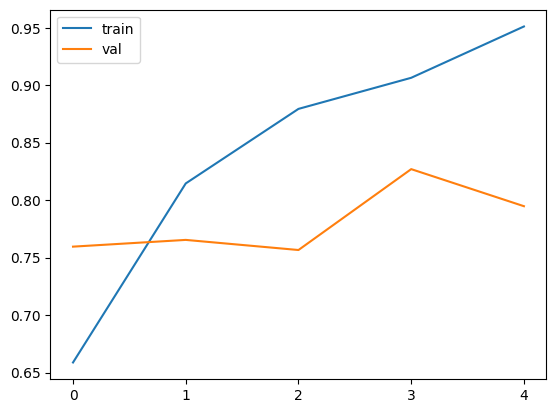

In [23]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(5))
plt.legend()

## 5. Learning rate
----

In [24]:
def make_model(learning_rate=0.01):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    ##############################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    ##############################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
        )

    return model

In [26]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.3928 - loss: 1.8329 - val_accuracy: 0.5279 - val_loss: 1.5538
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.5711 - loss: 1.3415 - val_accuracy: 0.6217 - val_loss: 1.2298
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.6392 - loss: 1.1116 - val_accuracy: 0.6833 - val_loss: 1.0562
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.6838 - loss: 0.9798 - val_accuracy: 0.7155 - val_loss: 0.9559
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.7040 - loss: 0.8919 - val_accuracy: 0.7537 - val_loss: 0.8843
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.7327 - loss: 0.8275 - val_accuracy: 0.7683 - val_loss: 0.8301
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.7451 - loss: 0.7778 - val_accuracy: 0.7742 - val_loss: 0.7915
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.7595 - loss: 0.7369 - val_accuracy: 0.7

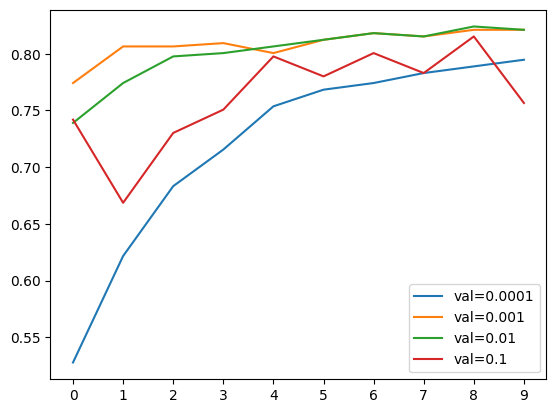

In [27]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=(f'train={lr}'))
    plt.plot(hist['val_accuracy'], label=(f'val={lr}'))
    
plt.xticks(np.arange(10))
plt.legend()

In [25]:
learning_rate = 0.001

## 6. Checkpointing
----

In [26]:
model.save_weights('model_v1.weights.h5')

In [27]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
    )

In [33]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds, 
    epochs=10, 
    validation_data=val_ds,
    callbacks=[checkpoint]
    )

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5100 - loss: 1.4775

96/96 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.6258 - loss: 1.1056 - val_accuracy: 0.7713 - val_loss: 0.7334
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7772 - loss: 0.6780

96/96 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.7894 - loss: 0.6287 - val_accuracy: 0.7918 - val_loss: 0.6398
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8470 - loss: 0.5061

96/96 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.8390 - loss: 0.5082 - val_accuracy: 0.8035 - val_loss: 0.5883
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8689 - loss: 0.4214

96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8673 - loss: 0.4225 - val_accuracy: 0.8065 - val_loss: 0.5546
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8889 - loss: 0.3706 - val_accuracy: 0.8065 - val_loss: 0.5510
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9072 - loss: 0.3187

96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9042 - loss: 0.3269 - val_accuracy: 0.8182 - val_loss: 0.5515
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9228 - loss: 0.2866 - val_accuracy: 0.8182 - val_loss: 0.5476
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9341 - loss: 0.2535

96/96 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.9316 - loss: 0.2604 - val_accuracy: 0.8299 - val_loss: 0.5524
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9452 - loss: 0.2316 - val_accuracy: 0.8211 - val_loss: 0.5478
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.9511 - loss: 0.2094 - val_accuracy: 0.8182 - val_loss: 0.5497


## 7. Adding more layers
----

In [22]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    ##############################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    ##############################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
        )

    return model

In [23]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()

10


Epoch 1/10


2025-11-23 15:06:15.913835: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 22429696 exceeds 10% of free system memory.
2025-11-23 15:06:15.947871: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42467328 exceeds 10% of free system memory.
2025-11-23 15:06:16.048443: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42467328 exceeds 10% of free system memory.
2025-11-23 15:06:16.048636: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 21233664 exceeds 10% of free system memory.
2025-11-23 15:06:16.087082: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 84934656 exceeds 10% of free system memory.


96/96 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.5528 - loss: 1.3360 - val_accuracy: 0.6921 - val_loss: 0.9483
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.7112 - loss: 0.8510 - val_accuracy: 0.7654 - val_loss: 0.7408
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.7689 - loss: 0.6563 - val_accuracy: 0.7889 - val_loss: 0.6471
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8227 - loss: 0.5290 - val_accuracy: 0.7977 - val_loss: 0.5869
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8520 - loss: 0.4518 - val_accuracy: 0.8006 - val_loss: 0.5819
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8739 - loss: 0.3907 - val_accuracy: 0.8211 - val_loss: 0.5404
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8986 - loss: 0.3358 - val_accuracy: 0.8182 - val_loss: 0.5460
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9162 - loss: 0.2917 - val_accuracy: 0.8152 - val_loss: 0.

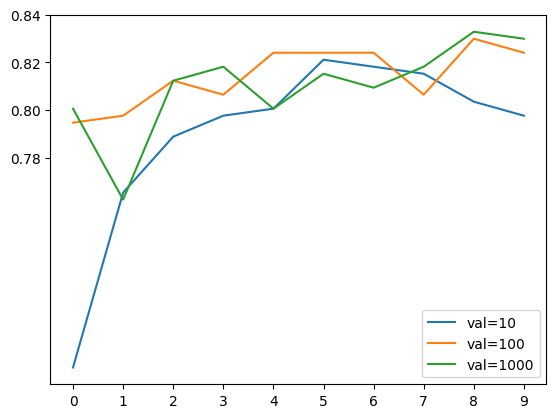

In [24]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=(f'val={size}'))
    
plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.84])
plt.legend()

## 8. Regularization and Dropout
----

In [25]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
        )

    base_model.trainable = False

    ##############################################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    ##############################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
        )

    return model

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate, 
        size_inner=size,
        droprate=droprate)
    
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.6724 - loss: 0.9700 - val_accuracy: 0.7331 - val_loss: 0.7865
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8188 - loss: 0.5160 - val_accuracy: 0.8035 - val_loss: 0.5800
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8827 - loss: 0.3514 - val_accuracy: 0.7830 - val_loss: 0.6651
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9247 - loss: 0.2451 - val_accuracy: 0.8065 - val_loss: 0.5922
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9547 - loss: 0.1745 - val_accuracy: 0.8299 - val_loss: 0.5565
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9769 - loss: 0.1172 - val_accuracy: 0.8006 - val_loss: 0.5876
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9866 - loss: 0.0858 - val_accuracy: 0.8299 - val_loss: 0.6098
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9941 - loss: 0.0592 - val_accuracy: 0.8240

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=(f'val={droprate}'))
    
plt.ylim(0.75,0.9)
plt.legend()

In [ ]:
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=(f'val={droprate}'))

## 9. Data Augmentation
----

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True
    )

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150,150), 
    batch_size=32
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(150,150), 
    batch_size=32
)

In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate, 
    size_inner=size,
    droprate=droprate
)
    
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

## 10. Train a large model
----

In [2]:
def make_model(input_size=150,
               learning_rate=0.01, 
               size_inner=100, 
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
        )

    base_model.trainable = False

    ##############################################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    ##############################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
        )

    return model

In [3]:
input_size = 299

In [6]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True
    )

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(input_size,input_size), 
    batch_size=32
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(input_size,input_size), 
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [7]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
    )

In [10]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate, 
    size_inner=size,
    droprate=droprate
)
    
history = model.fit(
    train_ds, 
    epochs=50, 
    validation_data=val_ds,
    callbacks=[checkpoint])

Epoch 1/50


2025-11-23 21:47:13.976547: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 177020928 exceeds 10% of free system memory.
2025-11-23 21:47:14.413360: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 177020928 exceeds 10% of free system memory.
2025-11-23 21:47:14.586442: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 354041856 exceeds 10% of free system memory.
2025-11-23 21:47:14.888779: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 354041856 exceeds 10% of free system memory.
2025-11-23 21:47:15.123211: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 354041856 exceeds 10% of free system memory.


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5920 - loss: 1.2224

96/96 ━━━━━━━━━━━━━━━━━━━━ 804s 8s/step - accuracy: 0.7194 - loss: 0.8320 - val_accuracy: 0.8563 - val_loss: 0.4758
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 805s 8s/step - accuracy: 0.8406 - loss: 0.4754 - val_accuracy: 0.8534 - val_loss: 0.4042
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8633 - loss: 0.3916

96/96 ━━━━━━━━━━━━━━━━━━━━ 801s 8s/step - accuracy: 0.8651 - loss: 0.3930 - val_accuracy: 0.8739 - val_loss: 0.3735
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 801s 8s/step - accuracy: 0.8889 - loss: 0.3305 - val_accuracy: 0.8680 - val_loss: 0.3498
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 799s 8s/step - accuracy: 0.8911 - loss: 0.2959 - val_accuracy: 0.8739 - val_loss: 0.3604
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9150 - loss: 0.2558

96/96 ━━━━━━━━━━━━━━━━━━━━ 799s 8s/step - accuracy: 0.9126 - loss: 0.2604 - val_accuracy: 0.8798 - val_loss: 0.3591
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 800s 8s/step - accuracy: 0.9087 - loss: 0.2543 - val_accuracy: 0.8768 - val_loss: 0.3539
Epoch 8/50
 3/96 ━━━━━━━━━━━━━━━━━━━━ 11:47 8s/step - accuracy: 0.8976 - loss: 0.3030

KeyboardInterrupt: 

## 11. Using the model
----

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

In [ ]:
model = keras.models.load_model('xception_v4_06_0.880.h5')

In [ ]:
model.evaluate(test_ds)

In [ ]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'
img = load_img(path, target_size=(299, 299))

In [ ]:
import numpy as np

x = np.array(img)
X = np.array([x])
X.shape

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

In [ ]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [ ]:
dict(zip(classes, pred[0]))